In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_names.append(os.path.join(dirname,filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-recognizer/dataset/MEN/20240705_112131.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_133142.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_160304.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240609_200332.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_160729.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_114708.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_112707.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_101942.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_154853.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240609_183952.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_111531.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_160616.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240609_202926.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_115955.jpg
/kaggle/input/gender-recognizer/dataset/MEN/20240705_122708.jpg
/kaggle/input/gender-recognizer/dataset/

In [3]:
#lets plot the images 
import matplotlib.pyplot as plt
import cv2
def images(image_path):
    z=plt.imread(image_path)
    
    plt.imshow(z)
    print(z.shape)
    plt.show()
    
    
def standardize_images(image_path):  #we need to standardize the shape of the image 
    z=cv2.imread(image_path)
    
    z1=cv2.resize(z,(100,100))

    
    return z1

In [4]:
z1_index=file_names.index('/kaggle/input/gender-recognizer/dataset/WOMAN/MEN/20240705_112131.jpg')

for i in range(z1_index+80,z1_index+120):
    standardize_images(file_names[i])

In [5]:
men_images=[]
women_images=[]


j=file_names.index('/kaggle/input/gender-recognizer/dataset/MEN/20240705_150352.jpg')
for i in range(j+1):
    men_images.append(file_names[i])
    
women_index=file_names.index('/kaggle/input/gender-recognizer/dataset/WOMAN/0269.jpg')
for i in range(j+1,women_index+1):
    women_images.append(file_names[i])



In [6]:
print(len(men_images),len(women_images))

646 646


(1024, 1024, 3)


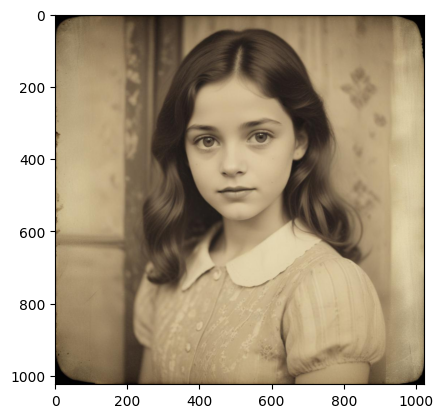

In [7]:
images("/kaggle/input/gender-recognizer/dataset/WOMAN/pikaso_texttoimage_antique-analog-vintage-my-girl-friend-stained-vign.jpeg.jpg")

In [9]:
import math
#here we ensure that the number of males and females are the same 

#now we have the male and the female images , first we train the autoencoder model ,
#and then after that we train the classification model 
#so first we prepare our data for autoencoder model training 
men_images_train=men_images[:math.floor(0.8*len(men_images))]
men_images_test=men_images[math.floor(0.8*len(men_images)):]

women_images_train=women_images[:math.floor(0.8*len(women_images))]
women_images_test=women_images[math.floor(0.8*len(women_images)):]




In [10]:

#base set is here , modify them to accordingly create the test and the train set for the classification models 
men_images_train_images=[]
for i in range(len(men_images_train)):
    men_images_train_images.append(standardize_images(men_images_train[i]))
    
women_images_train_images=[]
for i in range(len(women_images_train)):
    women_images_train_images.append(standardize_images(women_images_train[i]))

men_images_test_images=[]
for i in range(len(men_images_test)):
    men_images_test_images.append(standardize_images(men_images_test[i]))
    

women_images_test_images=[]
for i in range(len(women_images_test)):
    women_images_test_images.append(standardize_images(women_images_test[i]))


Invalid SOS parameters for sequential JPEG


In [11]:
#we now merge the train sets for training  the autoencoder model 
training_set_autoencoder=np.asarray(men_images_train_images+women_images_train_images)

testing_set_autoencoder=np.asarray(men_images_test_images+women_images_test_images)



In [12]:
#now lets import the necessary dependencies 
#for the creation of the model 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers import *
from keras.utils import plot_model 
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam 
from  tensorflow.keras.models import Model 



2024-07-21 07:34:46.743468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 07:34:46.743568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 07:34:46.884319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
# Create the autoencoder model 
input1 = Input(shape=(100,100 , 3))  # Input shape should match the expected data shape

# Flatten the input to match the expected Dense layer input shape
flat_input = tf.keras.layers.Flatten()(input1)

# Encoder part
dense_layer1 = Dense(25*50*3, activation='relu')(flat_input)
dense_layer2 = Dense(25*25*3, activation='relu')(dense_layer1)
dense_layer3 = Dense(100*3, activation='relu')(dense_layer2)
dense_layer4 = Dense(200, activation='relu')(dense_layer3)
dense_layer5 = Dense(150, activation='relu')(dense_layer4)
dense_layer6 = Dense(125, activation='relu', name='dense_layer6')(dense_layer5) # Latent dimension

# Decoder part
dense_layer7 = Dense(150, activation='relu')(dense_layer6)
dense_layer8 = Dense(200, activation='relu')(dense_layer7)
dense_layer9 = Dense(300, activation='relu')(dense_layer8)
dense_layer10 = Dense(1000, activation='relu')(dense_layer9)
dense_layer11=Dense(10000,activation='relu')(dense_layer10)
reshape_layer=Reshape((100,100,1))(dense_layer11)
conv2_transpose=Conv2DTranspose(3,kernel_size=1,strides=1,padding='same')(reshape_layer)

# Reshape the dense_layer to 100x100x3


# Define the autoencoder model
autoencoder_model = Model(inputs=input1, outputs=conv2_transpose)

# Print the model summary
autoencoder_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3750)           │   112,503,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1875)           │     7,033,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       562,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer6 (Dense)            │ (None, 125)            │        18,875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 150)            │        18,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1000)           │       301,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10000)          │    10,010,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 100, 100, 3)    │             6 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,629,306 (498.31 MB)

 Trainable params: 130,629,306 (498.31 MB)

 Non-trainable params: 0 (0.00 B)

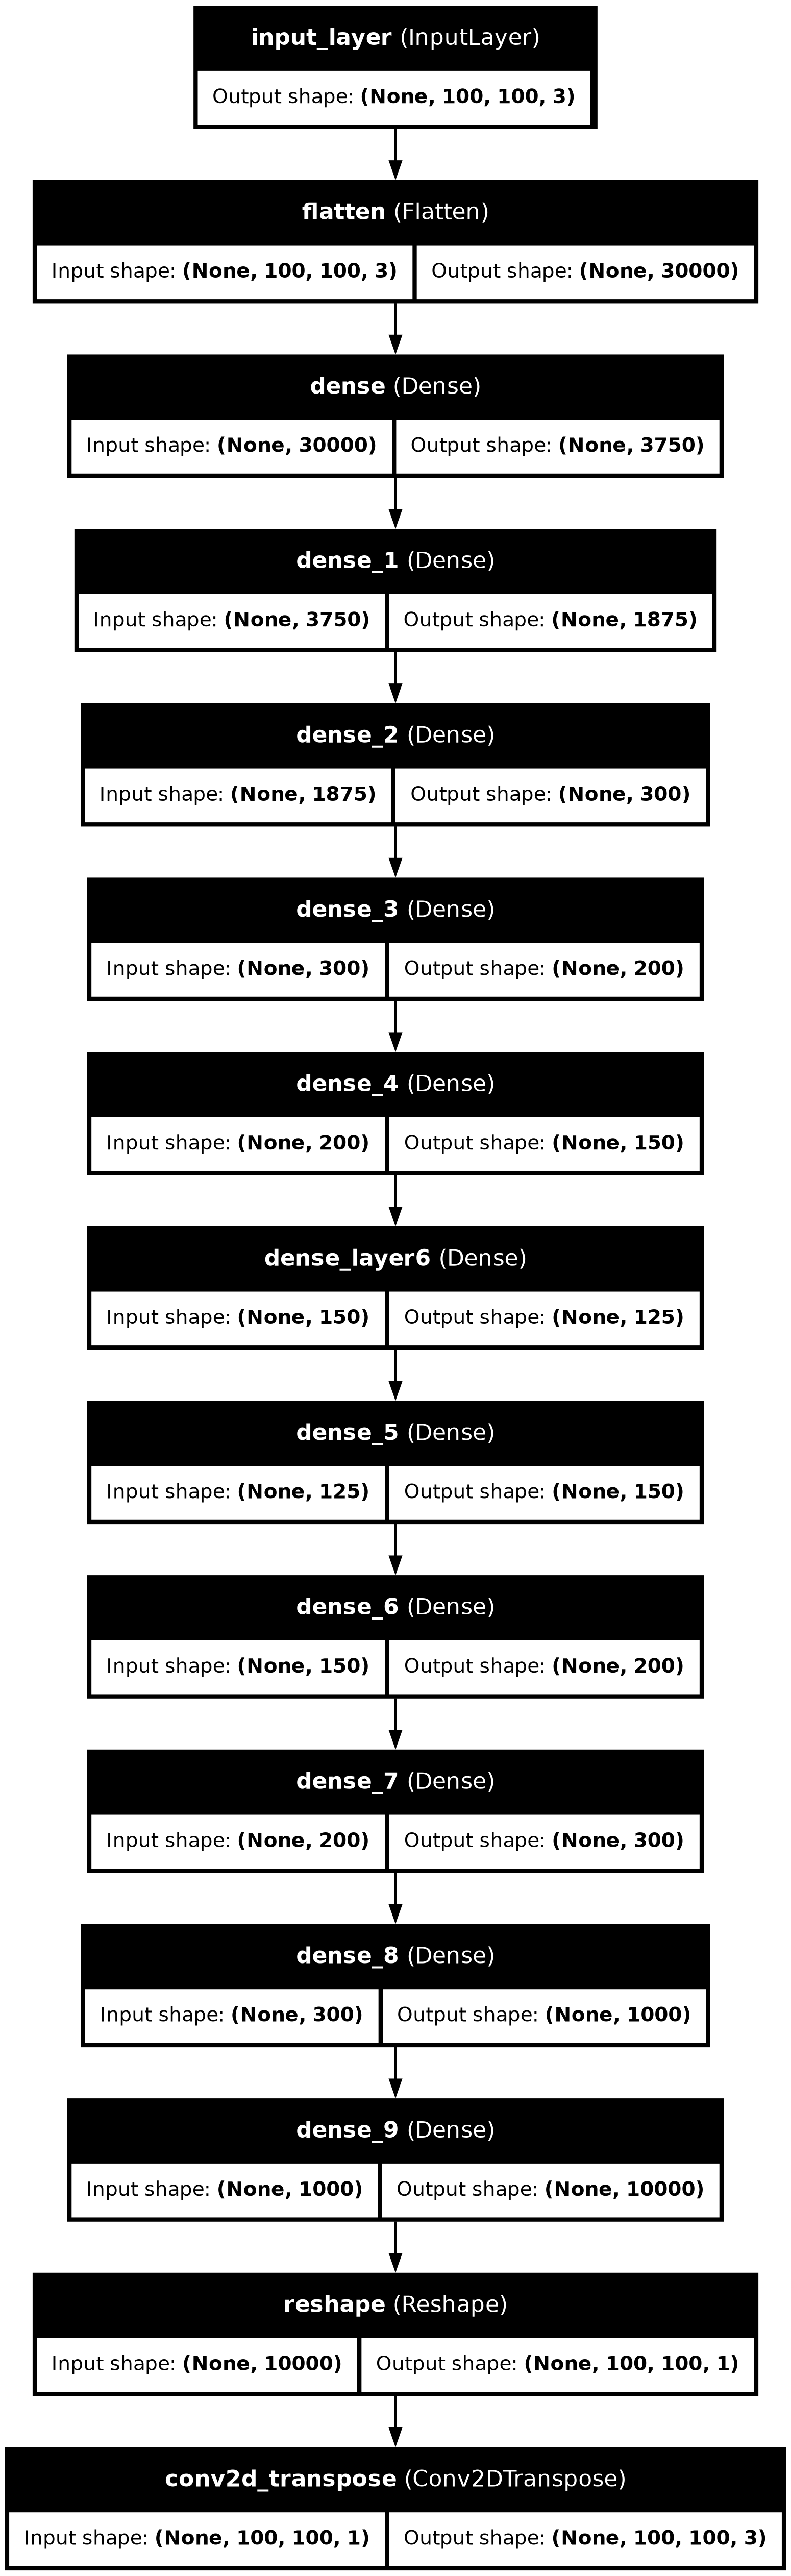

In [14]:
#now lets plot the model 
plot_model(autoencoder_model,show_layer_names=True,show_shapes=True)


In [15]:
#now lets compile the model 
autoencoder_model.compile(loss=MeanSquaredError(),metrics=['accuracy'],optimizer=Adam(learning_rate=0.001),run_eagerly=True)


In [16]:
#now lets fit the data into the model 
history=autoencoder_model.fit(training_set_autoencoder,training_set_autoencoder,verbose=1,epochs=10,batch_size=3,validation_data=[testing_set_autoencoder,testing_set_autoencoder])

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.1915 - loss: 15510.7256 - val_accuracy: 0.6708 - val_loss: 15394.9404
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 47s 137ms/step - accuracy: 0.6606 - loss: 15528.9766 - val_accuracy: 0.6708 - val_loss: 15325.7100
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 47s 136ms/step - accuracy: 0.5296 - loss: 15770.0342 - val_accuracy: 0.6708 - val_loss: 15257.0693
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 47s 136ms/step - accuracy: 0.6641 - loss: 15462.3652 - val_accuracy: 0.6708 - val_loss: 15188.7354
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 47s 136ms/step - accuracy: 0.6624 - loss: 15059.7686 - val_accuracy: 0.6708 - val_loss: 15120.6523
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 47s 136ms/step - accuracy: 0.6626 - loss: 15315.1318 - val_accuracy: 0.6708 - val_loss: 15052.7412
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 47s 135ms/step - accuracy: 0.6607 - loss: 15202.1211 - val_accuracy: 0.6708 - val_loss: 14985.1357
Epoch 8/10
344/344 ━━━━━━━━

In [116]:
print(training_set_autoencoder[0].shape)

(100, 100, 3)


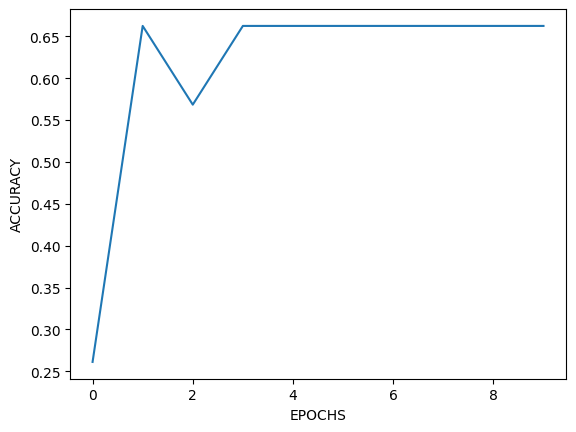

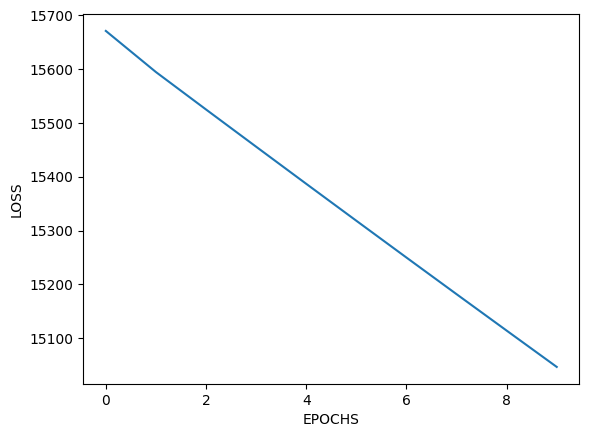

In [17]:
accuracy=history.history['accuracy']
loss=history.history['loss']

plt.plot(accuracy)
plt.ylabel("ACCURACY")
plt.xlabel("EPOCHS")
plt.show()

plt.plot(loss)
plt.ylabel("LOSS")
plt.xlabel("EPOCHS")
plt.show()


In [18]:
#NOW LETS SAVE THE MODEL 
autoencoder_model.save("autoencoder_model.h5")


In [19]:
#now after saving the model , lets now load the model 
from tensorflow.keras.models import load_model 

autoencoder_model1=load_model('autoencoder_model.h5')
autoencoder_model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3750)           │   112,503,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1875)           │     7,033,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       562,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer6 (Dense)            │ (None, 125)            │        18,875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 150)            │        18,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1000)           │       301,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10000)          │    10,010,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 100, 100, 3)    │             6 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,629,308 (498.31 MB)

 Trainable params: 130,629,306 (498.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
#now having created the autoencoder model 
#lets see how the autoencoder submodel predicts 
encoder_output=autoencoder_model1.layers[7].output

autoencoder_submodel=Model(inputs=autoencoder_model1.inputs,outputs=encoder_output)

autoencoder_submodel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3750)           │   112,503,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1875)           │     7,033,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       562,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer6 (Dense)            │ (None, 125)            │        18,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,208,900 (458.56 MB)

 Trainable params: 120,208,900 (458.56 MB)

 Non-trainable params: 0 (0.00 B)

In [117]:
#now lets predict some feature vectors for some of the images 
print(training_set_autoencoder[0].shape)

(100, 100, 3)


In [21]:
training_set_autoencoder1=np.expand_dims(training_set_autoencoder[0],axis=0)

print(training_set_autoencoder1.shape)

#now lets predict the feature vector

z=autoencoder_submodel.predict(training_set_autoencoder1)

print(z.shape)

(1, 100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
(1, 125)


I0000 00:00:1721547860.175073      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [22]:
#now after getting the required model predictions lets now create the classification model 
from tensorflow.keras.models import Sequential

classification_model=Sequential()
classification_model.add(Input((100,100,3)))
classification_model.add(autoencoder_submodel)

classification_model.add(Dense(100,activation='relu')) #the final output would be a 1x125 dimensional array
classification_model.add(BatchNormalization())
classification_model.add(Dense(75,activation='relu'))
classification_model.add(BatchNormalization())
classification_model.add(Dense(50,activation='relu'))
classification_model.add(BatchNormalization())
classification_model.add(Dense(32,activation='relu'))
classification_model.add(BatchNormalization())
classification_model.add(Dense(16,activation='relu'))
classification_model.add(BatchNormalization())
classification_model.add(Dense(8,activation='relu'))
classification_model.add(Dense(2,activation='softmax'))

#now lets create the summary of the model 
classification_model.summary()               

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)       │ (None, 125)            │   120,208,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,236,281 (458.67 MB)

 Trainable params: 120,235,735 (458.66 MB)

 Non-trainable params: 546 (2.13 KB)

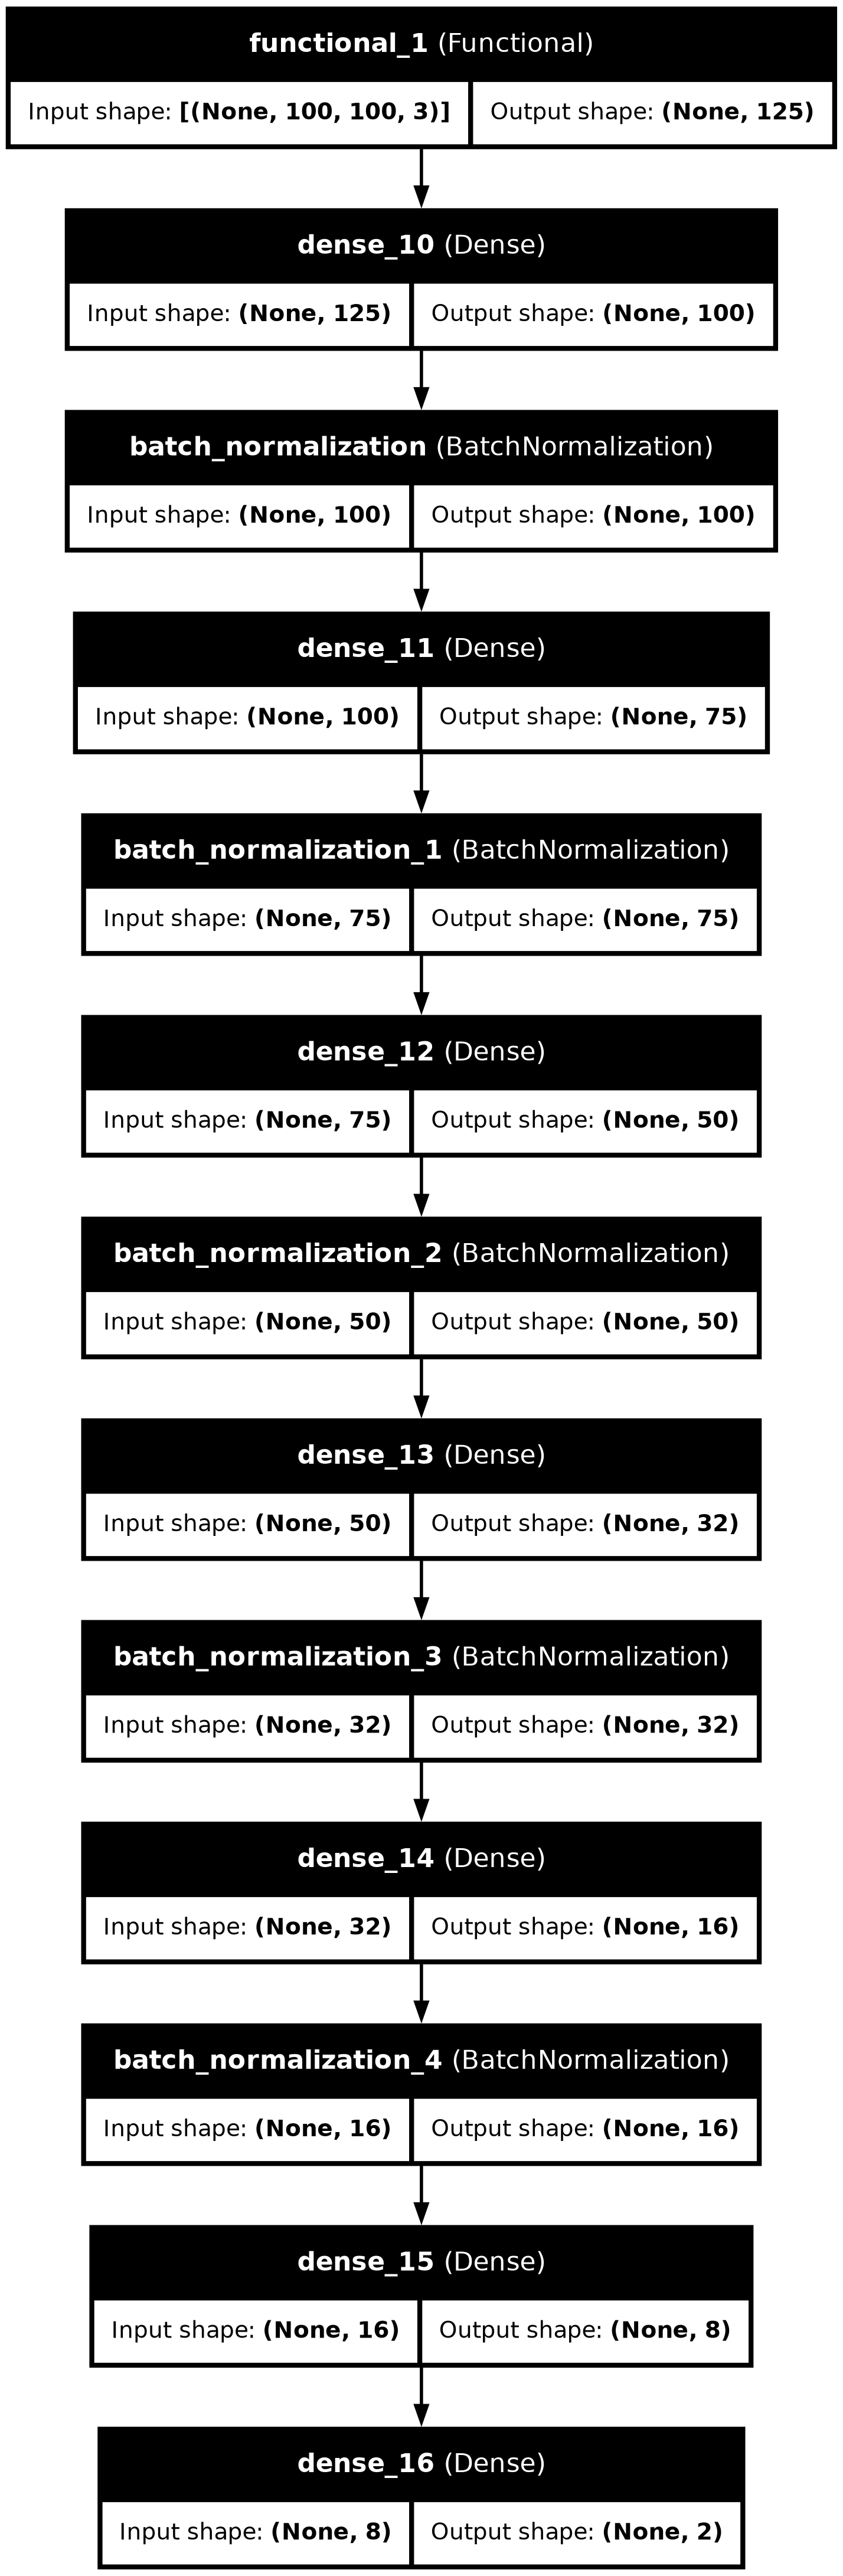

In [23]:
plot_model(classification_model,show_layer_names=True,show_shapes=True
          )

In [ ]:
#now lets preprocess our data to bring into the following model 
x_train_classification=men_image_train+women_images_train
y_train_classification=[]
for i in range(len(men_image_train)):
    y_train_classification.append([1,0])
    
for i in range(len(women_images_train)):
    y_train_classification.append([0,1])
    
x_train_classification_images=[]
for i in range(len(x_train_classification)):
    x_train_classification_images.append(standardize_images(x_train_classification[i]))
    
#NOW TYPECAST AS NUMPY ARRAY

x_train_classification_images=np.asarray(x_train_classification_images)
y_train_classification=np.asarray(y_train_classification)

